<a href="https://colab.research.google.com/github/GNC0610/INYRN-2025-1925361/blob/main/AF7_RedesNeuronalesArtificiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 7: Redes Neuronales Artificiales**


*   1799047 Eva Melissa Aguilar Frayre N4
*   2045431 Carlos Eduardo Reyes Rodríguez N4
*   2054276 Megan Johana Hernández Jasso N4
*   2049765 Daena victoria Santiago del Ángel N4
*   1925361 Guillermo Niño Camacho N4



1.Carga de las librerias a utilizar en la Actividad 7:

In [1]:
# Carga de librerias a utilizar
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

2.Carga de datos:

In [4]:
#Cargar el conjunto de datos a trabajar
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3.Normalizar las imagenes:

In [5]:
X_train= X_train.astype('float32')/255
X_test= X_test.astype('float32')/255

4.Definir las etiquetas de los conjuntos:

In [6]:
train_labels_cat=to_categorical(y_train)
test_labels_cat=to_categorical(y_test)

5.Definir la arquitectura del modelo:

In [9]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

6.Compilar el modelo de red neuronal:

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

7.Entrenar el modelo de red neuronal:

In [11]:
model.fit(X_train,train_labels_cat,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8615 - loss: 0.4873 - val_accuracy: 0.9522 - val_loss: 0.1549
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9630 - loss: 0.1277 - val_accuracy: 0.9678 - val_loss: 0.1085
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9755 - loss: 0.0794 - val_accuracy: 0.9697 - val_loss: 0.0956
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9824 - loss: 0.0543 - val_accuracy: 0.9663 - val_loss: 0.1134
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9856 - loss: 0.0430 - val_accuracy: 0.9726 - val_loss: 0.0948
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9701 - val_loss: 0.1115
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9908 - loss: 0.0271 - val_accuracy: 0.9745 - val_loss: 0.0936
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9916 - loss: 0.0232

8.Evaluamos el modelo entrenado:

In [12]:
test_loss, test_acc=model.evaluate(X_test,test_labels_cat)
print('Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.1111
Test accuracy: 0.9767000079154968


9.Mostrar tamaño total del modelo:

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

10.Predicciones de prueba:

In [14]:
predictions=model.predict(X_test)
predicted_classes=np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


11.Mostrar matriz de confunsion:

<Figure size 1000x1000 with 0 Axes>

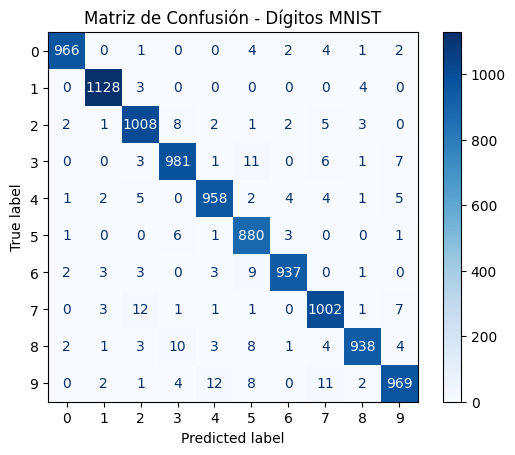

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Dígitos MNIST')
plt.show()

12.Reporte de clasificación:

In [42]:
print("\n Reporte del modelo")
print(classification_report(y_test, predicted_classes))
#


 Reporte del modelo
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.99      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.96      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

